# Susceptibility of Tree Species in Maryland to Climate Change per. Avg. of Three Climate Models (Hadley, PCM & GFDL)

The data is from the US Forestry Service Climate Change Atlas. The study uses the data to predict the future migration patterns of tree species in the aftermath of a climatic shift. 

This work was done on a volunteer basis for the Climate Working Group - Adaptation and Sequestration Subcommittee of Montgomery County, Maryland.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trees = pd.read_csv('MD_mean_fz_winlose.csv')

In [3]:
trees = trees.dropna()
trees

,Spp#,SppCN,SppSN,ClimIndx,ModRely,ModCur,HadHiDif,PcmLoDif,Gcm3AvgHiDif,Gcm3AvgLoDif
0,12,balsam fir,Abies balsamea,3.5,1,0.00,0.00,0.00,0.00,0.00
1,43,Atlantic white-cedar,Chamaecyparis thyoides,1.0,3,0.00,-0.00,-0.00,-0.00,-0.00
2,68,eastern redcedar,Juniperus virginiana,4.0,2,1.11,1.27,0.50,1.32,1.10
3,71,tamarack (native),Larix laricina,2.5,1,0.00,0.00,0.00,0.00,0.00
4,94,white spruce,Picea glauca,3.5,2,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
129,971,winged elm,Ulmus alata,4.5,1,0.03,4.47,1.98,4.52,3.02
130,972,American elm,Ulmus americana,4.5,2,0.68,1.95,0.05,1.45,0.47
131,973,cedar elm,Ulmus crassifolia,3.0,3,0.00,0.60,0.00,0.70,0.19
132,975,slippery elm,Ulmus rubra,0.0,2,0.37,0.33,0.02,0.28,0.11


In [5]:
trees.dtypes

Spp#              int64
SppCN            object
SppSN            object
ClimIndx        float64
ModRely           int64
ModCur          float64
HadHiDif        float64
PcmLoDif        float64
Gcm3AvgHiDif    float64
Gcm3AvgLoDif    float64
dtype: object

In [6]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 10 columns):
Spp#            134 non-null int64
SppCN           134 non-null object
SppSN           134 non-null object
ClimIndx        134 non-null float64
ModRely         134 non-null int64
ModCur          134 non-null float64
HadHiDif        134 non-null float64
PcmLoDif        134 non-null float64
Gcm3AvgHiDif    134 non-null float64
Gcm3AvgLoDif    134 non-null float64
dtypes: float64(6), int64(2), object(2)
memory usage: 11.5+ KB


In [7]:
trees[['SppCN', 'Gcm3AvgHiDif']].sort_values

<bound method DataFrame.sort_values of                     SppCN  Gcm3AvgHiDif
0              balsam fir          0.00
1    Atlantic white-cedar         -0.00
2        eastern redcedar          1.32
3       tamarack (native)          0.00
4            white spruce          0.00
..                    ...           ...
129            winged elm          4.52
130          American elm          1.45
131             cedar elm          0.70
132          slippery elm          0.28
133              rock elm          0.00

[134 rows x 2 columns]>

In [8]:
trees['Gcm3AvgHiDif'].describe()

count    134.000000
mean       0.112015
std        1.316531
min       -6.110000
25%       -0.065000
50%        0.000000
75%        0.267500
max        7.210000
Name: Gcm3AvgHiDif, dtype: float64

In [9]:
trees['Gcm3AvgHiDif'].value_counts().sort_index(ascending = False).head(35)

7.21    1
5.02    1
4.52    1
2.95    1
2.74    1
2.56    1
1.89    1
1.71    1
1.56    1
1.45    1
1.38    1
1.34    1
1.32    1
1.18    1
1.10    1
0.89    1
0.75    1
0.71    1
0.70    1
0.62    1
0.57    2
0.54    1
0.48    1
0.47    2
0.44    1
0.38    2
0.36    2
0.34    1
0.31    1
0.28    1
0.23    1
0.22    1
0.20    1
0.18    2
0.17    1
Name: Gcm3AvgHiDif, dtype: int64

In [10]:
trees['Gcm3AvgHiDif'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0.00
1     -0.00
2      1.32
3      0.00
4      0.00
       ... 
129    4.52
130    1.45
131    0.70
132    0.28
133    0.00
Name: Gcm3AvgHiDif, Length: 134, dtype: float64>

In [44]:
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(name='High Emissions Scenario', y=sort_by_gcm3['SppCN'], x=sort_by_gcm3['Gcm3AvgHiDif'], orientation='h'),
    go.Bar(name='Low Emissions Scenario', y=sort_by_gcm3['SppCN'], x=sort_by_gcm3['Gcm3AvgLoDif'], orientation='h')
])


fig.update_layout(barmode='group', autosize=False, width=1000, height=6000, title="MD Tree Species Susceptibility to Climate Change According to GCM3 Model",
    xaxis_title="GCM3 Threat Rating",
    yaxis_title="Tree Species",)
fig.show()


             
             

Text(0.5, 1.0, 'Frequency in Susceptibility Amongst Tree Species in MD')

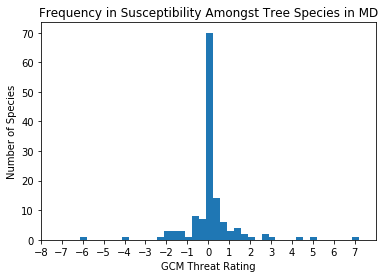

In [12]:
fig1, ax1 = plt.subplots()
ax1.hist(bar_widths, 40)
ax1.set_xlim(-8,8)
ax1.set_xlabel('GCM Threat Rating')
ax1.set_ylabel('Number of Species')
ax1.set_xticks(np.arange(-8, 8, step=1))
ax1.set_title("Frequency in Susceptibility Amongst Tree Species in MD")

# Which Species are Most at Risk?
<h4>Sorted by Genus</h4>

51


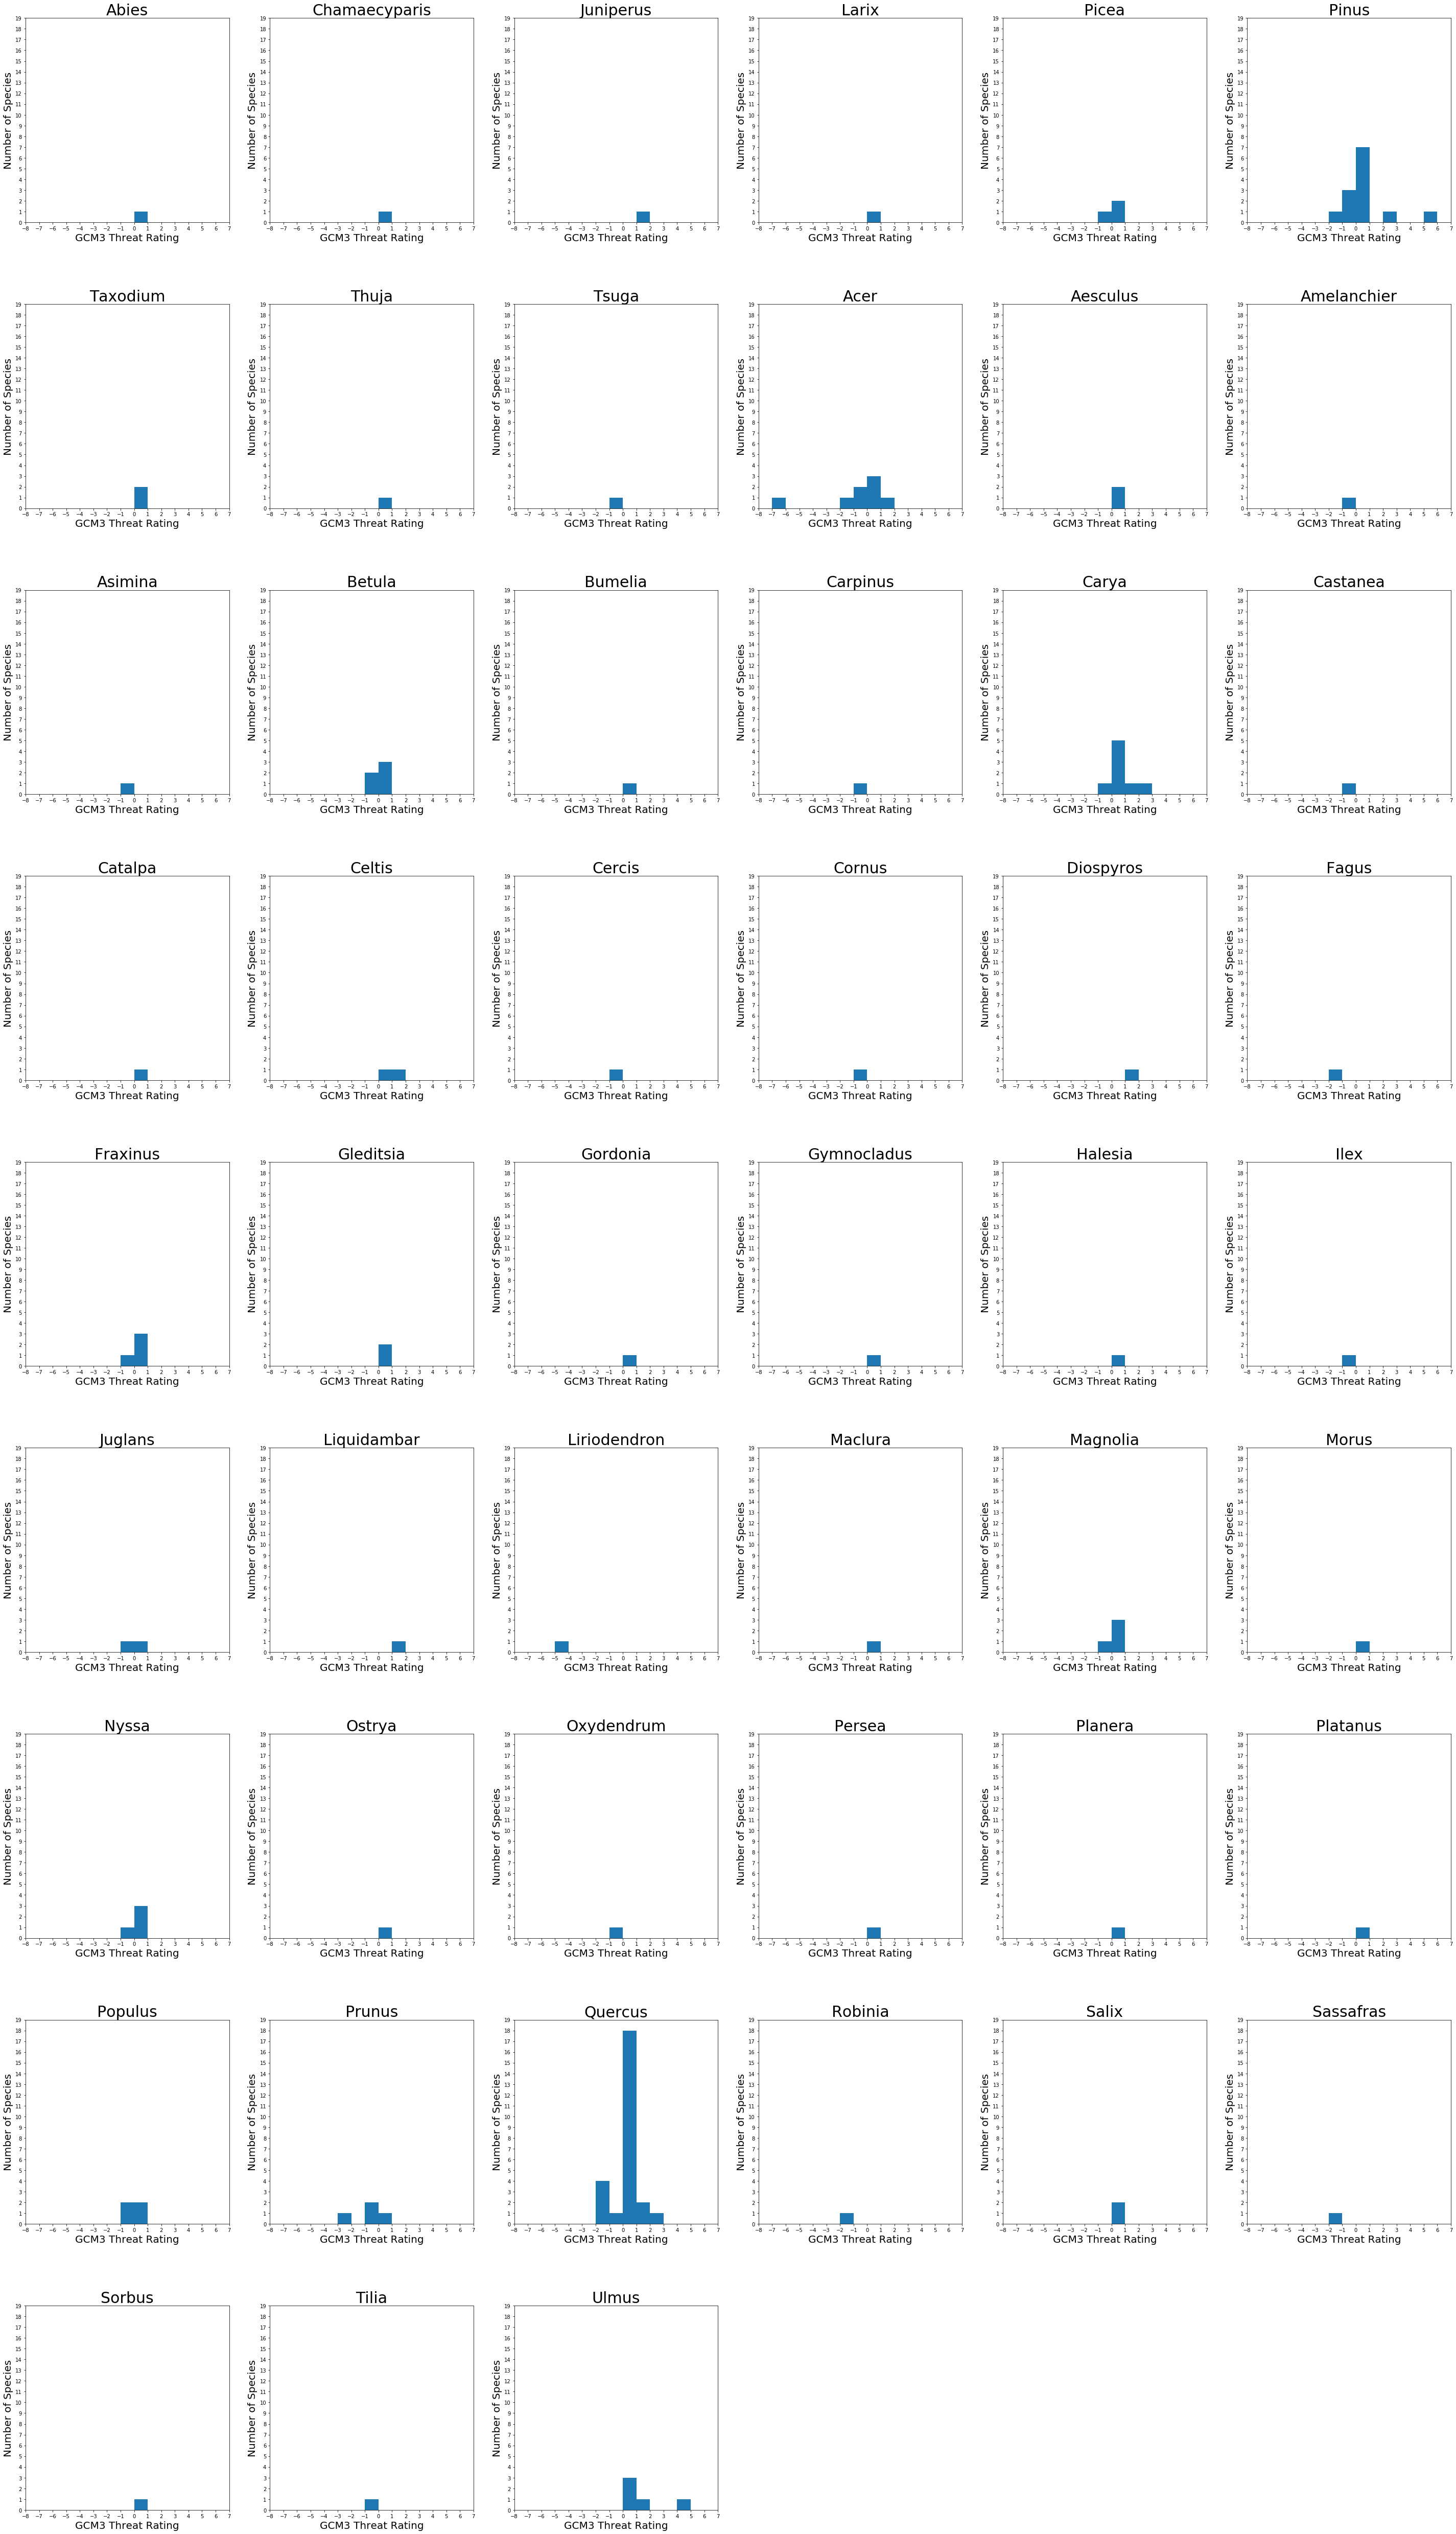

In [13]:
def get_genus(col):
    col = col.str.split().str[0]
    return col

trees['Genus'] = get_genus(trees['SppSN'])
genus_list = trees['Genus'].unique()
print(len(genus_list))

fig = plt.figure(figsize=(50,100))
counter = 1
for genus in genus_list:
    
    selected_rows = trees[trees['Genus'] == genus]
    #print(selected_rows[['Gcm3AvgHiDif', 'SppCN']])
    ax = fig.add_subplot(10, 6, counter)
    ax = selected_rows['Gcm3AvgHiDif'].plot(kind='hist', bins=range(-7,7))
    ax.set_title(genus, fontsize=30)
    ax.set_xlabel('GCM3 Threat Rating', fontsize=20)
    ax.set_ylabel('Number of Species', fontsize=20)
    fig.subplots_adjust(hspace = .4)
    ax.set_xticks(np.arange(-8, 8, step=1))
    ax.set_yticks(np.arange(0, 20, step=1))
    counter += 1

plt.show()
